In [13]:
# Import relevant libraries and modules
# Data analysis
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
import csv
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Import retail stores dataset
retail = pd.read_csv('summer_internship_takehome.csv')
retail.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False


# I. Summary statistics and plots

Annual Profit Margin Statistics
Mean:  0.2486322925670752
Median:  0.26184928404393765


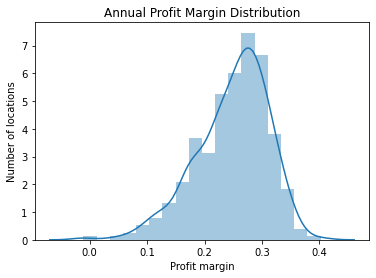

In [16]:
# Group rows by location
retail_location = retail.groupby('Location number').sum().drop(columns={'Month', 'Number of products', 'Owned'})

# Create profit margin column
retail_location['Profit margin'] = (retail_location['Gross revenue'] - 
                                   retail_location['Fixed cost'] - 
                                   retail_location['Variable cost'] - 
                                   retail_location['Rental cost']) / retail_location['Gross revenue']

# Calculate mean and median annual profit margin
print("Annual Profit Margin Statistics")
print("Mean: ", np.average(retail_location['Profit margin']))
print("Median: ", np.median(retail_location['Profit margin']))

# Visualize annual profit margin distribution
sns.distplot(retail_location['Profit margin'])
plt.title("Annual Profit Margin Distribution")
plt.xlabel("Profit margin")
plt.ylabel("Number of locations");

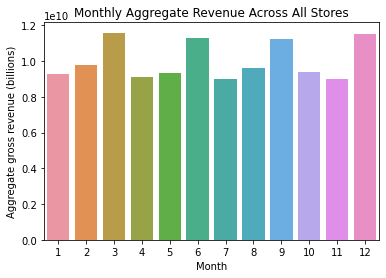

In [20]:
# Group rows by month
retail_monthly = retail.groupby('Month').sum().drop(columns={'Location number', 'Fixed cost', 'Variable cost', 'Rental cost', 'Number of products', 'Owned'})

# Visualize monthly aggregate revenue across all stores
sns.barplot(x=retail_monthly.index, y=retail_monthly['Gross revenue'])
plt.title("Monthly Aggregate Revenue Across All Stores")
plt.xlabel("Month")
plt.ylabel("Aggregate gross revenue (billions)");

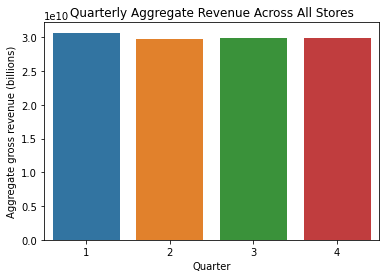

In [22]:
# Group rows by quarter
retail_quarterly = pd.DataFrame(
    data = {'Gross revenue' : [sum(retail_monthly.iloc[i:i+3, 0]) for i in [0,3,6,9]]}, columns=['Gross revenue']
)

# Visualize quarterly aggregate revenue across all stores
sns.barplot(x=retail_quarterly.index+1, y=retail_quarterly['Gross revenue']);
plt.title("Quarterly Aggregate Revenue Across All Stores")
plt.xlabel("Quarter")
plt.ylabel("Aggregate gross revenue (billions)");

# II. Cleaning the data

# III. Quantify drivers of success